In [2]:
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
%matplotlib inline

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# shape of data
x_train[0].shape

(28, 28)

In [5]:
# image
img0 = x_train[0]

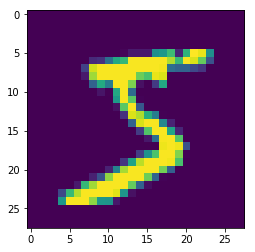

In [7]:
plt.imshow(img0);

In [8]:
img0.min(), img0.max()

(0, 255)

In [9]:
# scaling
(img0/255)[14,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31764706, 0.94117647,
       0.99215686, 0.99215686, 0.46666667, 0.09803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [10]:
# scaling
x_train_normalized = x_train/255
x_test_normalized = x_test/255
y_train_vector = keras.utils.to_categorical(y_train, 10)
y_test_vector = keras.utils.to_categorical(y_test, 10)

In [11]:
# getting validation set
x_train_final = x_train_normalized[:50000]
y_train_final = y_train_vector[:50000]
x_validation_final = x_train_normalized[50000:]
y_validation_final = y_train_vector[50000:]

In [12]:
x_train_final.shape, x_validation_final.shape

((50000, 28, 28), (10000, 28, 28))

In [13]:
input_shape = x_train_normalized.shape[1:]

In [14]:
model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(128, activation='relu'))     
model.add(Dropout(0.2))                      
model.add(Dense(64, activation='relu'))      
model.add(Dropout(0.2))                      
model.add(Dense(10, activation='softmax'))   

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# verbosity 0, 2, 1
hist = model.fit(x_train_final, y_train_final, batch_size=32, epochs=3,
          validation_data=(x_validation_final, y_validation_final), verbose=1, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 4s 83us/step - loss: 0.3607 - acc: 0.8937 - val_loss: 0.1433 - val_acc: 0.9574
Epoch 2/3
50000/50000 [==============================] - 4s 80us/step - loss: 0.1813 - acc: 0.9469 - val_loss: 0.1232 - val_acc: 0.9645
Epoch 3/3
50000/50000 [==============================] - 4s 80us/step - loss: 0.1471 - acc: 0.9587 - val_loss: 0.1120 - val_acc: 0.9710


In [16]:
model.evaluate(x_test_normalized, y_test_vector)

10000/10000 [==============================] - 0s 30us/step


[0.1067502697895281, 0.9704]

In [17]:
model.predict(x_test_normalized[0:3])

array([[1.6042031e-11, 3.3370786e-13, 3.9952064e-07, 2.0343184e-07,
        9.3055568e-14, 3.8758646e-10, 6.0576468e-17, 9.9999940e-01,
        6.2816738e-11, 4.3170868e-08],
       [8.1475225e-14, 5.1395737e-08, 9.9999988e-01, 6.2041821e-08,
        3.0264235e-19, 1.3622852e-12, 2.1333649e-10, 8.7987573e-14,
        5.1079800e-11, 8.4001920e-21],
       [9.3715213e-09, 9.9994993e-01, 8.9336700e-06, 1.8029702e-07,
        4.6905852e-06, 1.5812468e-07, 6.6902663e-07, 2.8633745e-05,
        6.7310484e-06, 1.3974075e-08]], dtype=float32)

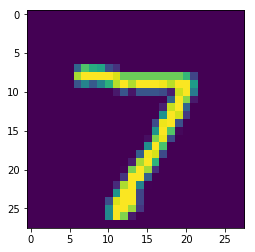

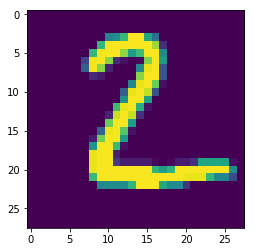

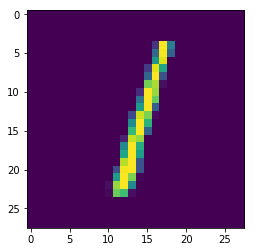

In [18]:
for i in range(3):
    plt.imshow(x_test_normalized[i])
    plt.show()

In [30]:
e = hist.epoch
tl = hist.history['loss']
vl = hist.history['val_loss']
ta = hist.history['acc']
va = hist.history['val_acc']

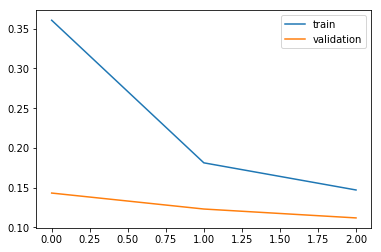

In [31]:
plt.plot(e, tl, label='train')
plt.plot(e, vl, label='validation')
plt.legend()
plt.show()

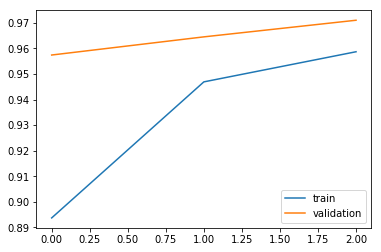

In [32]:
plt.plot(e, ta, label='train')
plt.plot(e, va, label='validation')
plt.legend()
plt.show()